In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# csv = pd.read_csv("./player_stats_contracts.csv")
# csv

In [12]:
player_avg = pd.read_csv("./player_avg.csv")
player_avg['avg-sal'] = pd.to_numeric(player_avg['avg-sal'])

ValueError: Unable to parse string "  " at position 0

In [13]:
avg_corr = player_avg[
    ["games", "tgt", "rec", "yds", "y-r", "td", "1d", "succ", "avg-sal"]
].corr()

ValueError: could not convert string to float: ''

In [5]:
print(
    player_avg[
        ["games", "tgt", "rec", "yds", "y-r", "td", "1d", "succ", "avg-sal"]
    ].dtypes
)

games      float64
tgt        float64
rec        float64
yds        float64
y-r        float64
td         float64
1d         float64
succ       float64
avg-sal     object
dtype: object


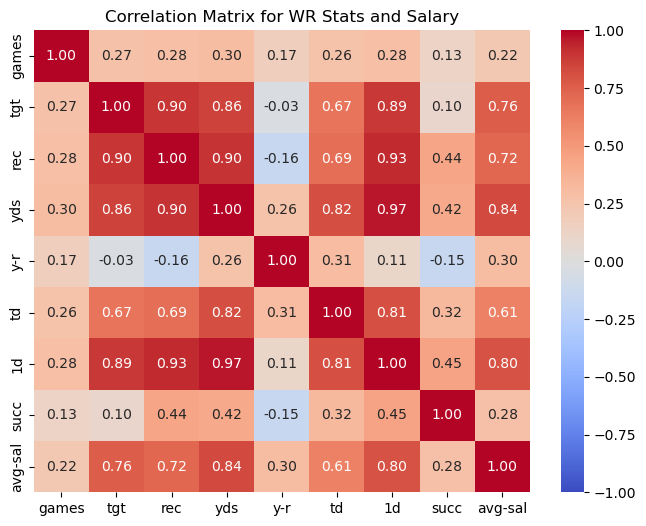

In [20]:
# Compute correlation matrix
correlation = csv[
    ["games", "tgt", "rec", "yds", "y-r", "td", "1d", "succ", "avg-sal"]
].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix for WR Stats and Salary")
plt.show()